In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [15]:
bt = load_boston()
bt_data = pd.DataFrame(bt.data, columns=bt.feature_names)
bt_target = pd.DataFrame(bt.target, columns=['price'])
df = pd.concat([bt_data, bt_target], axis = 1)
df.head()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


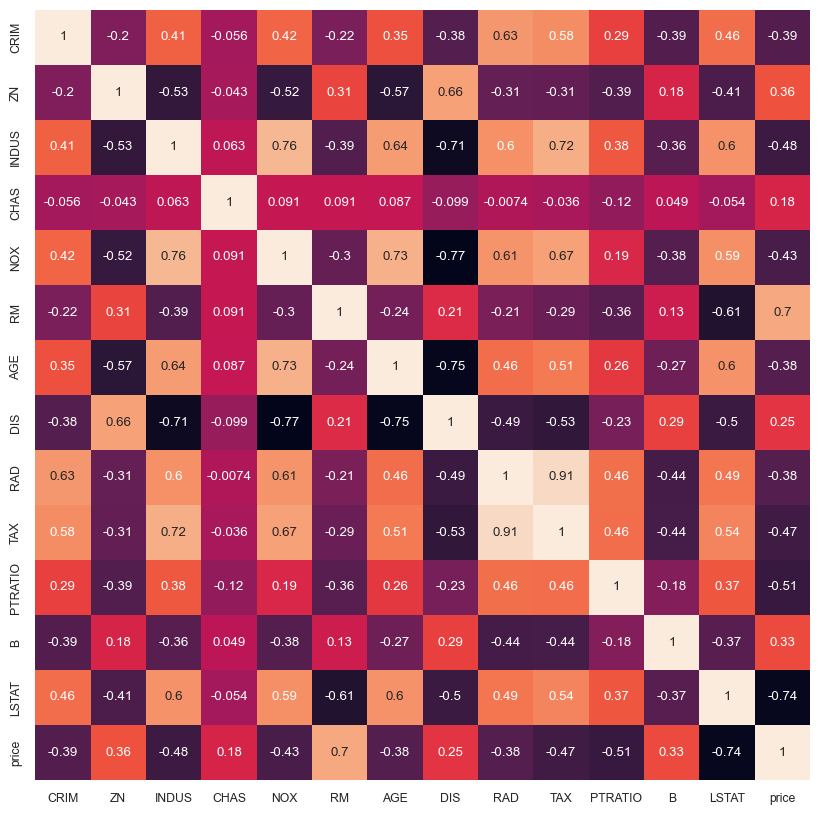

In [16]:
df_corr = df.corr()
plt.figure(figsize=(10,10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr,annot=True,cbar=False)
plt.show()

In [17]:
features = ['price','LSTAT','RM','PTRATIO','INDUS']
df = df.loc[:,features]
df.head()

,price,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


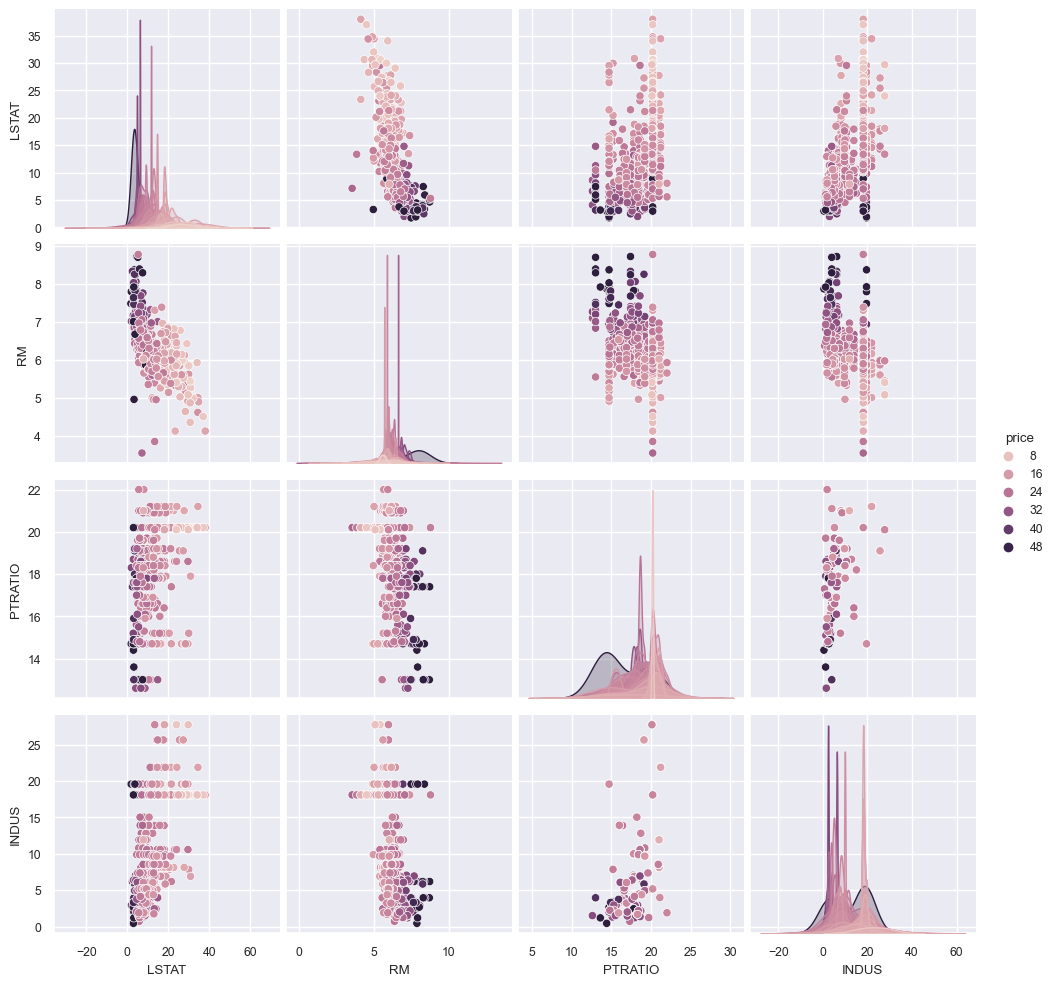

In [59]:
sns.pairplot(data=df,hue='price')

In [36]:
def lr_muchine(data):
    X = data.drop('price', axis=1)
    y = bt_target
    
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                shuffle = True, random_state=0)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    test_score = lr.score(X_test, y_test)
    train_score = lr.score(X_train,y_train)
    
    print('기울기값, 절편값 :', lr.coef_, lr.intercept_)
    print('MAE :', mae)
    print('훈련 점수 :',train_score)
    print('테스트 점수 :',test_score)
    
    return y_pred

In [37]:
y_pred = lr_muchine(df)

기울기값, 절편값 : [-3.9952552   2.99264143 -2.4188396  -0.20825774] 22.57570729426414
MAE : 4.411875366969683
훈련 점수 : 0.7221778668620298
테스트 점수 : 0.4844876458906867


In [44]:
X = df.drop('price', axis=1)
y = bt_target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                            shuffle = True, random_state=0)

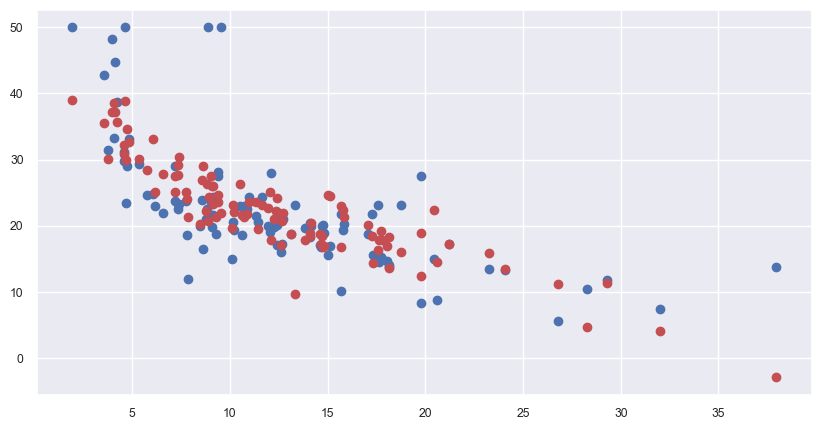

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], y_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()           

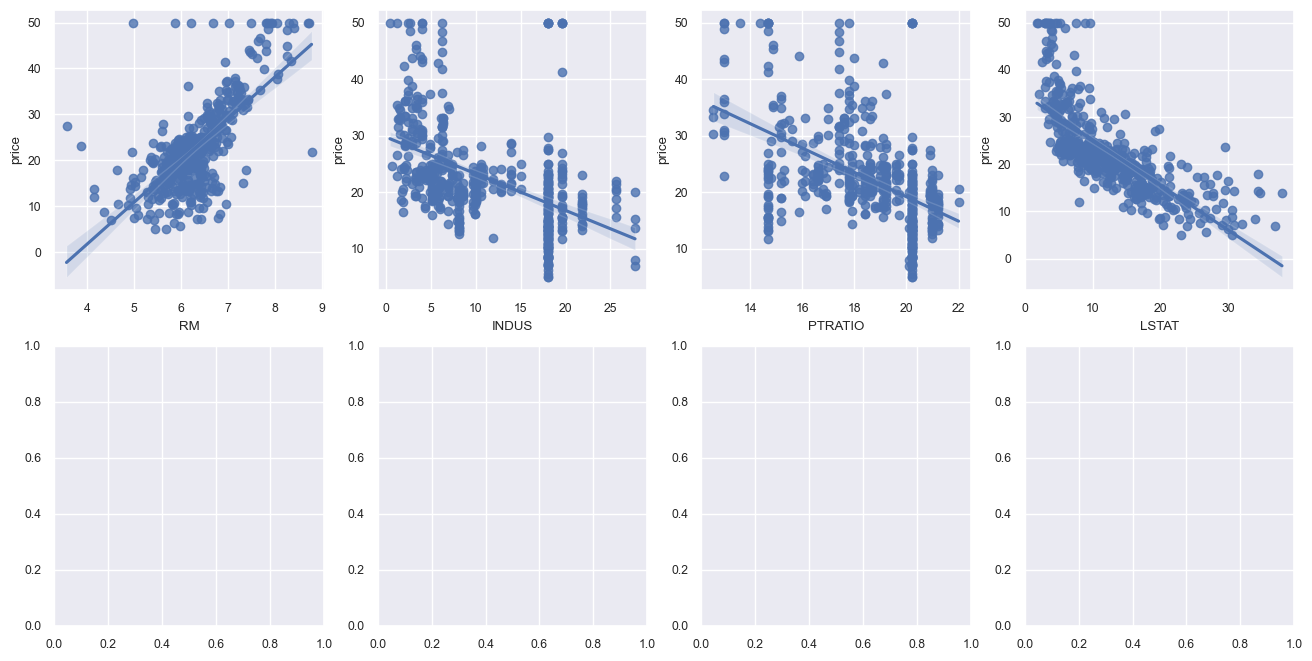

In [58]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['RM','INDUS','PTRATIO','LSTAT']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='price', data=df, ax=axs[row][col])